# Feature Engineering and k-Nearest Neighbors with the California Housing Prices Data Set
* [Overview](#overview)   
* [Using seaborn](#using-seaborn)
* [Reviewing the Data Set](#reviewing-the-data-set)
* [Examining the Categorical Data](#examining-the-categorical-data)
* [One-Hot Encoding](#one-hot-encoding)
* [k Nearest Neighbors](#k-nearest-neighbors)
* [Re-scaling the Data](#rescaling-tje-data)
* [Putting it Together](#putting-it-together)

## Overview

## Using Seaborn 

*seaborn* is a Python library that extends matplotlib. It can be used to make plots that give information. You should be able to install seaborn using whatever method you've used for other packages (conda or pip). We can then import it. 

In [1]:
import seaborn as sns #import the seaborn library

Seaborn has a bunch of nice plotting features. One thing that I like is the ability to create scatterplots with color-coding due to a certain variable using the [sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) command. 

## Reviewing the Data Set 

We will be working with the California Housing Prices Data Set from two weeks ago. 

In [2]:
import pandas as pd

housing_df = pd.read_csv("california-housing.csv")

We can use seaborn's scatterplot command to visualize how location affects price in this data set.

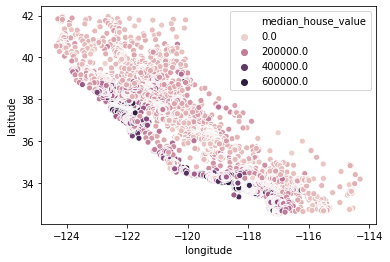

In [3]:
sns.scatterplot(x = "longitude",
               y = "latitude",
               data = housing_df,
               hue = "median_house_value")


## Examining the Categorical Data

A quick review: here is what the data columns look like. 

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.dtypes #access the data types of the columns. 

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

There is one column that is not numeric. (We could automate the check for categorical variables by using the [select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) command.)

In the past, we dealt with this column by dropping it. Now, we want to see if it actually makes a difference to our data set. We'll analyze this both quantitatively using pandas and visually in seaborn. 

Let's see how many unique categories there are in ocean_proximity.

In [6]:
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let's create a latitude-longitude scatterplot that shows what these categorical features represent.

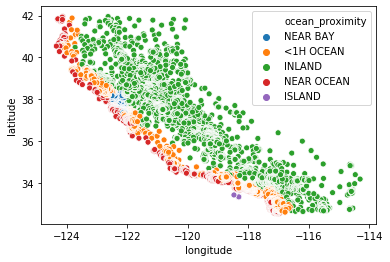

In [7]:
sns.scatterplot(x = "longitude",
              y = "latitude",
              data = housing_df,
              hue = "ocean_proximity")

In [8]:
housing_df.groupby(["ocean_proximity"]).mean() #Find the average value by different categories. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


Let's also use seaborn to create some boxplots to visualize how the housing prices vary with the different categories, using the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) command. 

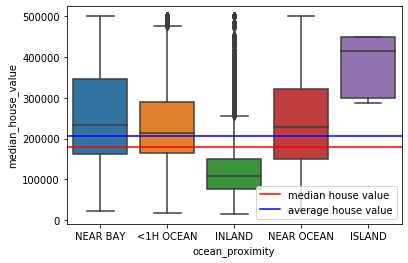

In [9]:
graph = sns.boxplot(x = "ocean_proximity", y = "median_house_value", data = housing_df)
graph.axhline(housing_df["median_house_value"].median(),
             color = "red", label = "median house value")
graph.axhline(housing_df["median_house_value"].mean(),
             color = "blue", label = "average house value")
graph.legend()

## One Hot Encoding

Our machine learning algorithms are mathematical processes based on numbers. To use these categorical variables, one approach is to use 0 or 1. 

One approach uses pandas *get_dummies* command. 

In [10]:
ocean_dummies = pd.get_dummies(housing_df["ocean_proximity"]) #get dummy variables

In [11]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Now we need to add the columns from ocean_dummies onto housing_df.

In [12]:
new_df = housing_df.join(ocean_dummies)

In [13]:
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [14]:
new_df = new_df.drop(columns = ["ocean_proximity"]) #We've gotten that information into a usable form. 

## We could just try going back to Linear Regression, and see if it improves the fit. 

## We've done more data preprocessing, and we have a better understanding of what our data represents. 

## k Nearest Neighbors -- A New Predictor

We plan to use the *k-nearest-neighbors* approach to regression. sklearn implements this with [kNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) class. 

The function has many options. Some of them are: 

1. *n_neighbors* tells how many neighbors to use in the prediction. Default is 5.
2. *weights* tells how to weight the responses from the neighbors (uniform, or scaled by distance).

We will discuss how some of these options work, as well as some of the other options in tomorrow's videos. 

![Example:nn-regression-data-set](nn-regression-data-set.png)

It's important to remember here that distance doesn't just mean physical distance. When we use this with the housing data set, all of the variables will be used in calculating distance. <span style="color:green"> A better term might be "similarity". </span>

## Rescaling the Data

When we look at distance, it's important that features be on the same scale. For instance, is a housing district which is 10000 dollars away "closer" than one that is 2 degrees of longitude away? 

To address this issue, we need to rescale all of our variables so that they are on the same scale. 

Two approaches: StandardScaler and MinMaxScaler. 

StandardScaler: takes things on their z-scores (Math 270). For each column, it subtracts the mean of the column, and divides by the standard deviation of the column. 

StandardScaler object that does this for you. You will need to use one of the two scaling approaches for your kNearestNeighbors to work.



In [34]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

new_df.dropna(axis = "index", inplace = True) #drop missing observations. 

y = new_df["median_house_value"]
X = new_df.drop(columns = ["median_house_value"])
# We create data first so that 

X_standard = pd.DataFrame(st_scaler.fit_transform(X), columns = X.columns.copy())

In [35]:
X_standard.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,-0.890239,-0.682713,-0.015645,2.828661,-0.384186


The output of this is a numpy array, so I need to cast it as a data frame. I will now have a new data frame that is compatible with k Nearest Neighbors. 

In [36]:
X_standard.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [31]:
X_standard.dropna(axis = "index", inplace = True)

In [ ]:
new_df_standard.dropna(axis = "index", inplace = True)

In [ ]:
new_df_standard.isna().sum()

In [ ]:
new_df_standard.columns

## Using a Nearest Neighbors Regressor

Just like before, we will split our data
* features and target.
* training and testing set. 

Now we'll separate into training set and testing set, using an sklearn command.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_standard,y, train_size = 0.8)

We create the regression object and fit to the data. 

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
three_nabe_regress = KNeighborsRegressor(n_neighbors = 3,
                                        weights = "uniform")

In [41]:
three_nabe_regress.fit(Xtrain, ytrain) #fitting my KNearestNeighbors Regressor on my training data. 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Let's look at the scores on the training data. 

In [42]:
three_nabe_regress.score(Xtrain, ytrain)

0.8557617273826413

In [43]:
three_nabe_regress.score(Xtest, ytest)

0.6912478688023727

Let's look at the residuals. 

In [44]:
test_predictions = three_nabe_regress.predict(Xtest) #predictions of the model on the testing data
residuals = ytest - test_predictions 

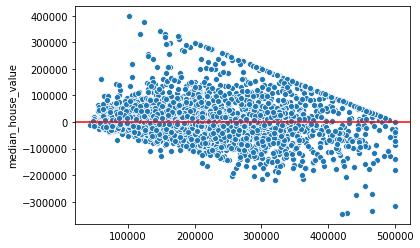

In [45]:
import matplotlib.pyplot as plt

sns.scatterplot(x = test_predictions, 
                y = residuals)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.show()

## Building a Pipeline

### First Attempt

In [48]:
from sklearn.pipeline import make_pipeline

My goal is to build a model that uses scaling, feature selection, and k Neighbor Regression. 

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [54]:
scaler = StandardScaler() #create a scaler
selector = SelectKBest(score_func = f_regression, k = 3) #create selector
predictor = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") #predictor

In [55]:
my_pipeline = make_pipeline(scaler, selector, predictor)

In [56]:
my_pipeline.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x118c657a0>)),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [57]:
my_pipeline.score(Xtrain, ytrain)

0.6780198173201473

In [58]:
my_pipeline.score(Xtest, ytest)

0.5403283673691337